<a href="https://colab.research.google.com/github/11jolek11/panda_sklearn/blob/main/panda_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = sns.load_dataset('mpg').dropna()
cechy = ['horsepower', 'mpg', 'cylinders']
df = df[cechy]     # ładniej za pomocą funkcji pipe
df.sample(5)

,horsepower,mpg,cylinders
274,103.0,20.3,5
369,88.0,34.0,4
256,100.0,20.5,6
27,210.0,11.0,8
113,107.0,21.0,6


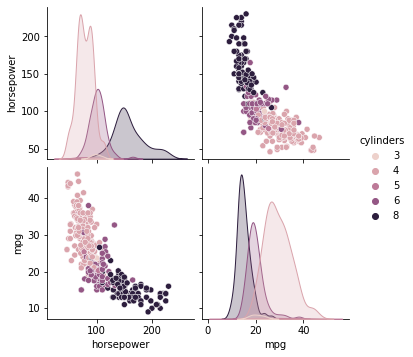

In [3]:
sns.pairplot(data = df, hue='cylinders')

In [4]:
x_data = df['horsepower'].to_numpy()
y_data = df['mpg'].to_numpy()

In [5]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(x_data.reshape(-1,1), y_data.reshape(-1,1))

LinearRegression()

In [6]:
a, b = linreg.coef_, linreg.intercept_
print(f'a = {a}\nb={b}')

a = [[-0.15784473]]
b=[39.93586102]


In [7]:
x_test = np.linspace(x_data.min(), x_data.max(), num=300)
y_pred = linreg.predict(x_test.reshape(-1,1))

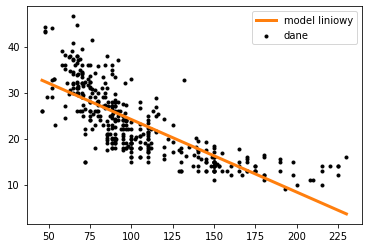

In [8]:
# from sklearn.preprocessing import StandardScaler, MinMaxScaler fit, transform
plt.scatter(x_data,y_data, color='black', marker='.', label='dane')
plt.plot(x_test, y_pred, color='tab:orange', linewidth=3, label='model liniowy')
plt.legend()
#plt.axis('square')
plt.show()

Ocenić model
$$
Q(\mathbf{a}) = \sqrt{\frac{1}{N}\sum_{i=1}^N (y_i - \overline{y}_i)^2}
$$

To na dole jest źle, bo naszą intencją jest ocena jakości modelu na danych nowych

In [9]:
x_data
y_pred = linreg.predict(x_data.reshape(-1,1))

In [10]:
print(f'MSE = {np.sqrt(((y_data - y_pred)**2).mean()):0.4f}')

# co jest dobrym modelem odniesienia dla oceny jakości modelu liniowego?

MSE = 9.8784


In [11]:
from sklearn.metrics import mean_squared_error
print(f'MSE = {mean_squared_error(y_data, y_pred):0.4f}')
print(f'MSE_nasze = {np.sqrt(((y_data - y_pred)**2).mean()):0.4f}')

MSE = 23.9437
MSE_nasze = 9.8784


In [12]:
x_data.size

392

In [13]:
y_true = np.array([3, -0.5, 2, 7])
y_pred = np.array([2.5, 0.0, 2, 8])
mean_squared_error(y_true, y_pred, squared=False)

0.6123724356957945

In [14]:
np.sqrt(((y_true-y_pred)**2).mean())

0.6123724356957945

A teraz jest lepiej, bo "zasymulujemy" sobie pojawienie się nowych danych

In [15]:
x_data = df['horsepower'].to_numpy()
y_data = df['mpg'].to_numpy()

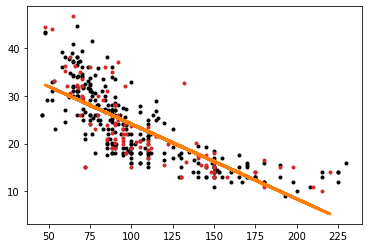

MSE_nasze test = 10.1251
MSE_nasze train = 9.7497


In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data)

linreg = LinearRegression().fit(x_train.reshape(-1,1),y_train.reshape(-1,1))
y_test_pred = linreg.predict(x_test.reshape(-1,1))
y_train_pred = linreg.predict(x_train.reshape(-1,1))

plt.scatter(x_train, y_train, color='black', marker='.', label='dane do uczenia')
plt.scatter(x_test, y_test, color='tab:red', marker='.', label='dane do testowania')
plt.plot(x_test, y_test_pred, color='tab:orange', linewidth=3, label='model liniowy')
plt.show()

print(f'MSE_nasze test = {np.sqrt(((y_test - y_test_pred)**2).mean()):0.4f}')
print(f'MSE_nasze train = {np.sqrt(((y_train - y_train_pred)**2).mean()):0.4f}')

Zadanie domowe: wytrenuj inny model, np. maszynę wektorów wspierających ([SVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)), drzewo decyzyjne ([DecisionTreeRegresor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)) itp.

Wkomponuj nowy kod do powyższego kodu.

Zastanów się, który ze zbadanych modeli byłby najlepszy, posługując się wizualną oceną predykcji modelu oraz wartościami błędów średniokwadratowych.

In [20]:
from sklearn.svm import SVR

clf = SVR(kernel='linear')
clf.fit(x_train.reshape(-1,1), y_train.reshape(-1,1))

y_prediction = clf.predict(x_test.reshape(-1, 1))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
print(f'MSE_nasze test = {np.sqrt(((y_test - y_prediction)**2).mean()):0.4f}')

MSE_nasze test = 5.2328


In [22]:
y_prediction = clf.predict(x_train.reshape(-1, 1))
print(f'MSE_nasze test = {np.sqrt(((y_train - y_prediction)**2).mean()):0.4f}')

MSE_nasze test = 4.7899
